The purpose of this project is to determine whether or not to approve the applicant a credit card.

I will try to build up a machine learning model in order to predict whether the client is a good client (make loan payments on time) or bad client (make overdue repayments).

In [1]:
# set up modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# read the csv file -- application_record.csv
data1=pd.read_csv(r"C:\Users\ivan3\Documents\Visual Studio 2017\Projects\csv file\application_record.csv")
print(data1.head(3))
print(f"Application record -- Shape of DataFrame: total rows={data1.shape[0]} and total columns={data1.shape[1]}.")

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0          Working               Higher education   
1          427500.0          Working               Higher education   
2          112500.0          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0     Civil marriage   Rented apartment      -12005          -4542   
1     Civil marriage   Rented apartment      -12005          -4542   
2            Married  House / apartment      -21474          -1134   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1        

In [2]:
# read the csv file -- credit_record.csv
data2=pd.read_csv(r"C:\Users\ivan3\Documents\Visual Studio 2017\Projects\csv file\credit_record.csv")
print(data2.head())
print(f"Credit record -- Shape of DataFrame: total rows={data2.shape[0]} and total columns={data2.shape[1]}.")

print(data2.info())


        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
Credit record -- Shape of DataFrame: total rows=1048575 and total columns=3.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


First of all, let's determine the rule whether the client is a good client or client.

We will only keep each clients' latest record by checking "MONTHS_BALANCE" in data2.

If the status of that record is X / C / 0 , then he is a good client --> 0

If the status of that record is 1/2/3/4/5 , then he is a bad client  --> 1

In [3]:
data2["STATUS"].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [4]:
data2=data2.drop_duplicates(subset=["ID"], keep ="first")
rule={"X":0, "C":0, "0":0,
       "1":1,"2":1,"3":1,"4":1,"5":1}
data2["STATUS"].replace(rule, inplace=True)
data2["STATUS"]=data2["STATUS"].astype("int64")
data2["good/bad_client"]=np.where(data2["STATUS"]==0, 0, 1)
data2["good/bad_client"].value_counts()

0    45520
1      465
Name: good/bad_client, dtype: int64

In [5]:
data2=data2.drop(columns=["MONTHS_BALANCE","STATUS"], axis=1)
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45985 entries, 0 to 1048545
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               45985 non-null  int64
 1   good/bad_client  45985 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 898.1 KB
None


In [6]:
# merge data1 and data2 into a new DataFrame called df and create a csv file called df
df=pd.merge(data1, data2, how="left", on="ID")
df.to_csv("df.csv",index=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

According to the sheet, we know that there only contains 36457 rows in "good/bad_client".

It means that only 36457 of "ID" can be paired in both data1 and data2.

I will remove all other useless rows and save it as a new DataFrame called new_df.

In [7]:
new_df=df.dropna(subset=["good/bad_client"])
print(new_df.shape)
print('\n','new_df["good/bad_client"] :','\n',new_df["good/bad_client"].value_counts())

(36457, 19)

 new_df["good/bad_client"] : 
 0.0    36075
1.0      382
Name: good/bad_client, dtype: int64


In [8]:
# columns -- "ID", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL" don't contain useful information.
# columns -- "CNT_CHILDREN", "NAME_FAMILY_STATUS" are duplicate with 'CNT_FAM_MEMBERS'
# drop out useless or duplicate information

new_df=new_df.drop(columns=["ID","CNT_CHILDREN", "NAME_FAMILY_STATUS",
                            "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE","FLAG_EMAIL"], axis=1)


In [9]:
# seperate the columns between categorical variables and numerical variables
print(new_df.columns)
object_col=new_df.select_dtypes(include="object").columns
print(object_col)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'good/bad_client'],
      dtype='object')
Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')


In [10]:
# Since column "OCCUPATION_TYPE" contains missing value, i will replace all the enpty cells to be "other".
new_df["OCCUPATION_TYPE"]=new_df["OCCUPATION_TYPE"].fillna("other")

In [11]:
# check the unique elements in each categorical columns
for i in object_col:
    if i != "OCCUPATION_TYPE":
        print(f"{i}:{new_df[i].unique()}")

CODE_GENDER:['M' 'F']
FLAG_OWN_CAR:['Y' 'N']
FLAG_OWN_REALTY:['Y' 'N']
NAME_INCOME_TYPE:['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE:['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_HOUSING_TYPE:['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [12]:
onehot=['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
ordinal=object_col.drop(onehot)

# convert categorical variable to numeric variable by using OneHotEncoder
for col in onehot:
    new_df=pd.get_dummies(new_df, drop_first=True, columns=[col])

# convert categorical variable to numeric variable by using Ordinal encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in ordinal:
    new_df[col]=label_encoder.fit_transform(new_df[col])

In [13]:
# convert negative numbers to positive numbers in "DAYS_BIRTH" and "DAYS_EMPLOYED" 
new_df["DAYS_BIRTH"]=new_df["DAYS_BIRTH"]*-1
new_df["DAYS_EMPLOYED"]=new_df["DAYS_EMPLOYED"]*-1
new_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,good/bad_client,NAME_INCOME_TYPE_Pensioner,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_other
0,1,1,1,427500.0,1,12005,4542,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,427500.0,1,12005,4542,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,112500.0,4,21474,1134,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,270000.0,4,19110,3051,1,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,270000.0,4,19110,3051,1,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
# As some features are in different range, it is better to do Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED"]] = scaler.fit_transform(new_df[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED"]])
new_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,good/bad_client,NAME_INCOME_TYPE_Pensioner,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_other
0,1,1,1,2.365845,1,-0.945169,0.463532,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,2.365845,1,-0.945169,0.463532,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,-0.728827,4,1.309091,0.438774,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.818509,4,0.746300,0.452700,1,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.818509,4,0.746300,0.452700,1,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
# now new_df is complete and ready to perform prediction!

# selecting The Prediction Target (y) and The features (X)
y=new_df["good/bad_client"]
X=new_df.drop(["good/bad_client"], axis=1)

print("Before using SMOTE, the amount of 0 and 1: \n",y.value_counts())

# Using SMOTE to solve the imbalanced data problem
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print("After using SMOTE, the amount of 0 and 1: \n",y.value_counts())

Before using SMOTE, the amount of 0 and 1: 
 0.0    36075
1.0      382
Name: good/bad_client, dtype: int64
After using SMOTE, the amount of 0 and 1: 
 0.0    36075
1.0    36075
Name: good/bad_client, dtype: int64


In [16]:
# split the data into train part and validation part
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.2, train_size=0.8, random_state=42)


from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(train_X, train_y)
predict=model.predict(val_X)

In [22]:
from sklearn.metrics import accuracy_score
print("\naccuracy :", accuracy_score(predict, val_y))

from sklearn.metrics import classification_report
print("\nclassification_report :\n",classification_report(predict, val_y))

result=pd.DataFrame({"predict result ":predict, "actual result ":val_y})
print(result.head(10))


accuracy : 0.9868329868329868

classification_report :
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7256
         1.0       0.99      0.99      0.99      7174

    accuracy                           0.99     14430
   macro avg       0.99      0.99      0.99     14430
weighted avg       0.99      0.99      0.99     14430

       predict result   actual result 
14148              0.0             0.0
44003              1.0             1.0
23715              0.0             0.0
72053              1.0             1.0
44021              1.0             1.0
39932              1.0             1.0
3181               0.0             0.0
25213              0.0             0.0
19227              0.0             0.0
64814              1.0             1.0


c:\Users\ivan3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


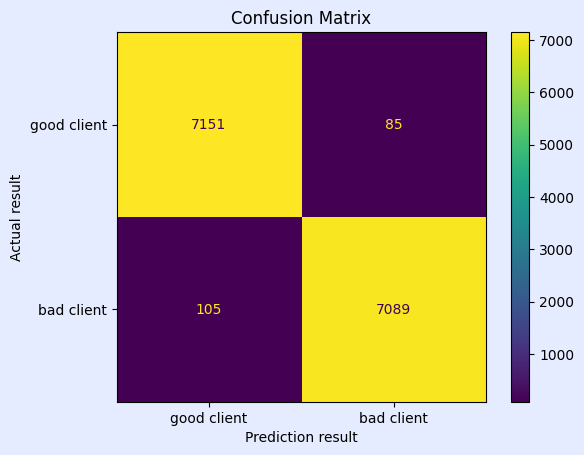

In [23]:
# plot the confusoion matrix
fig,ax=plt.subplots()
plt.rcParams['figure.facecolor'] = "#e6ecff"
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, val_X, val_y, ax=ax)

plt.rcParams['figure.facecolor'] = "#e6ecff"
ax.set_xlabel('Prediction result');ax.set_ylabel('Actual result') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['good client', 'bad client'])
ax.yaxis.set_ticklabels(['good client', 'bad client'])
plt.show()

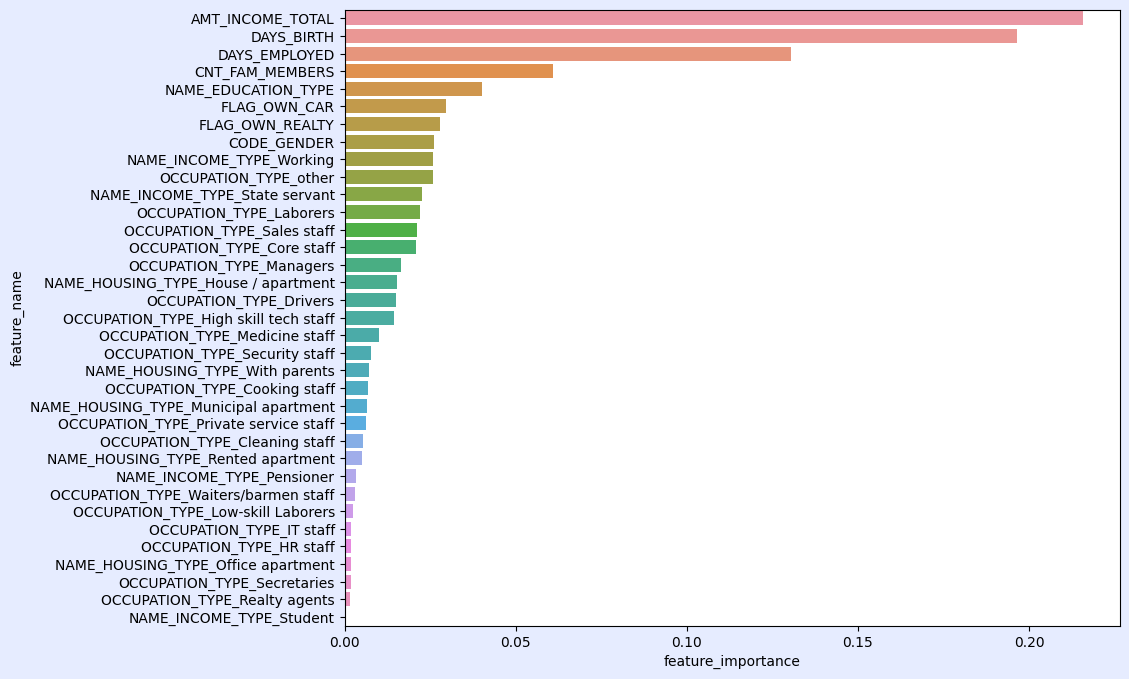

In [24]:
#feature importance
fig,ax=plt.subplots(figsize=(10,8))
feature_importance = np.array(model.feature_importances_)
feature_name=np.array(train_X.columns)
feature_df=pd.DataFrame({"feature_importance":feature_importance, "feature_name":feature_name})
feature_df=feature_df.sort_values(by=["feature_importance"], ascending=False)
sns.barplot(x=feature_df["feature_importance"], y=feature_df["feature_name"])
plt.show()

Further study:

1. Other method to define a client is good or bad?

2. Other way to handle the imbalanced data problem?

3. 